In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('HR_comma_sep.csv')

In [3]:
df 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
#Missing val 

In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

<AxesSubplot:>

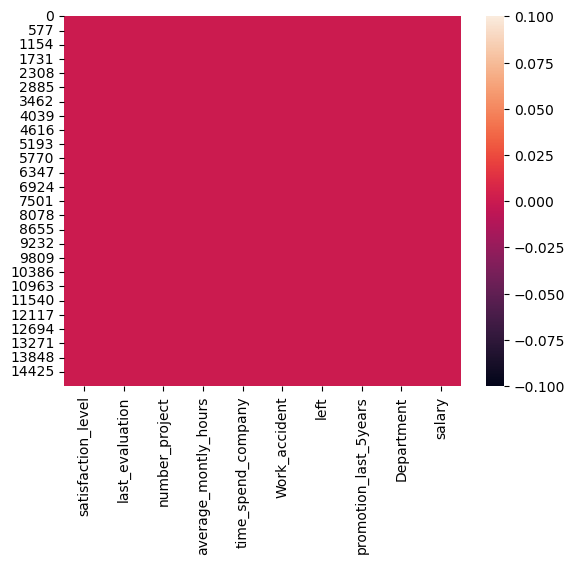

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.shape

(14999, 10)

In [8]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [9]:
#handle categorical val

In [10]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
df 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

# Data exploration and visualization

In [13]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


observation
1. avegage satisfaction is low employee left otherwise retained.
2.average montly hours high emploee left
3. promotion in last 5 years: employees given promotion are likely to be retained
4. employee have high salary are retained

In [14]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [15]:
df.groupby('Work_accident').sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years
Work_accident,,,,,,,
0,7785.67,9194.00,48824,2582148,44866,3402,243
1,1406.22,1546.81,8218,433406,7604,169,76


In [16]:
no_of_accident=df['Work_accident'].value_counts()

In [17]:
no_of_accident.index

Int64Index([0, 1], dtype='int64')

In [18]:
no_of_accident.values

array([12830,  2169], dtype=int64)

In [19]:
mn=df.groupby(['Work_accident','left']).size().reset_index().rename(columns={0:'total'}) 

In [20]:
mn 

,Work_accident,left,total
0,0,0,9428
1,0,1,3402
2,1,0,2000
3,1,1,169


<AxesSubplot:xlabel='Work_accident', ylabel='total'>

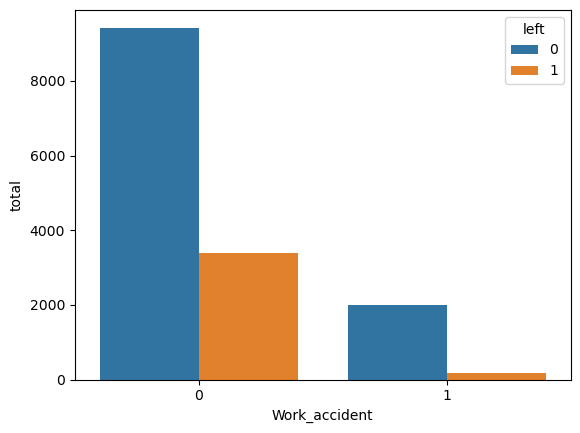

In [21]:
sns.barplot(x='Work_accident',y='total',hue='left',data=mn )

In [22]:
#salary

In [23]:
df.groupby(['salary','left']).size().reset_index( )

,salary,left,0
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


In [24]:
df 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [25]:
cross_tab = pd.crosstab(df['salary'], df['left'])

# Plot the cross-tabulation as a bar plot
cross_tab

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='salary'>

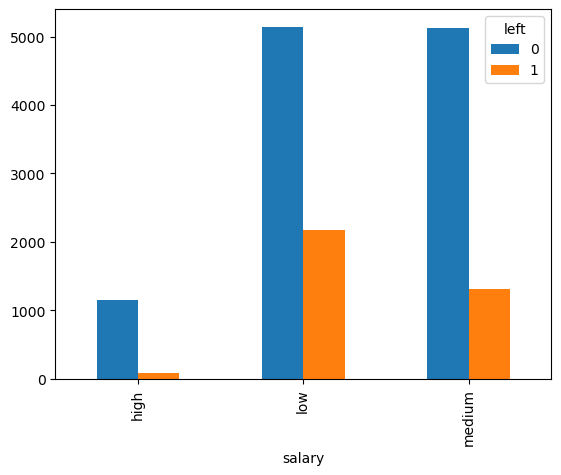

In [26]:
cross_tab.plot(kind='bar')

In [27]:
temp=df.groupby(['salary','left']).size().reset_index( ).rename(columns={0:'Total'})
temp 

,salary,left,Total
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


<AxesSubplot:xlabel='salary', ylabel='Total'>

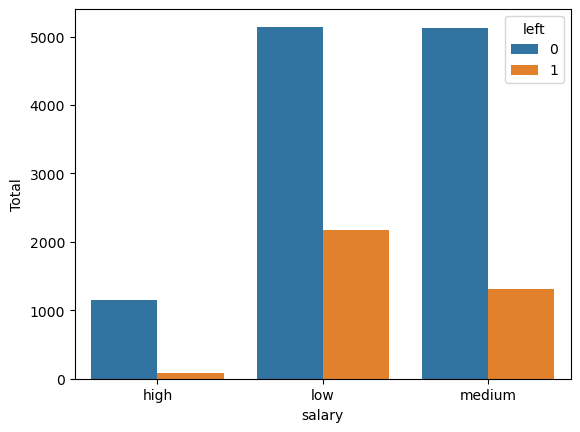

In [28]:
sns.barplot(x='salary',y='Total',hue='left',data=temp ) 

In [29]:
temp=pd.crosstab(df['Department'],df['left'])

In [30]:
temp 

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<AxesSubplot:xlabel='Department'>

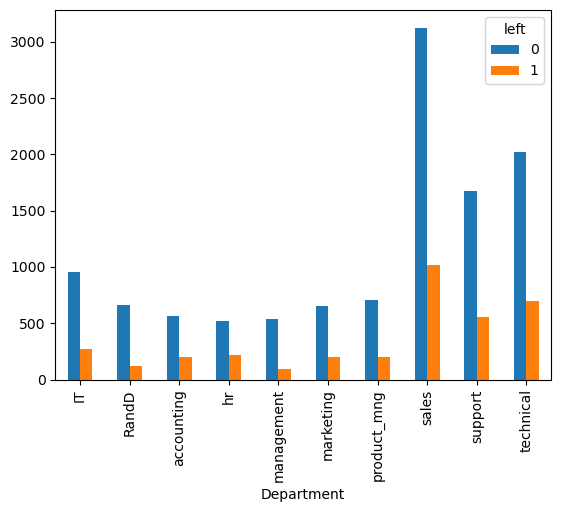

In [31]:
temp.plot(kind='bar')

In [32]:
#handle categorical data
df['salary'].unique()


array(['low', 'medium', 'high'], dtype=object)

In [33]:
temp=pd.get_dummies(df['Department'],drop_first=True)

In [34]:
df=pd.concat([df,temp],axis=1) 

In [35]:
df.head( )

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,1,0,0


In [36]:
temp=pd.get_dummies(df['salary'],prefix='salary',drop_first=True)

In [37]:
temp 

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [38]:
df=pd.concat([df,temp],axis=1)

In [39]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,accounting,hr,management,marketing,product_mng,sales,support,technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0


In [40]:
df.drop(['Department','salary'],axis=1,inplace=True)

In [41]:
df 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [42]:
#train  model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [43]:
X=df.drop('left',axis=1)

In [44]:
y=df['left']

In [45]:
X 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,1,0


In [46]:
y 

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)

In [48]:
xtrain.shape 

(11999, 18)

In [49]:
xtest.shape 

(3000, 18)

In [50]:
model=LogisticRegression() 

In [51]:
model.fit(xtrain,ytrain) 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
model.predict(xtest)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [53]:
model.score(xtest,ytest)

0.8053333333333333

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
mat=confusion_matrix(ytest,model.predict(xtest))

In [56]:
mat 

array([[2105,  182],
       [ 402,  311]], dtype=int64)

<AxesSubplot:>

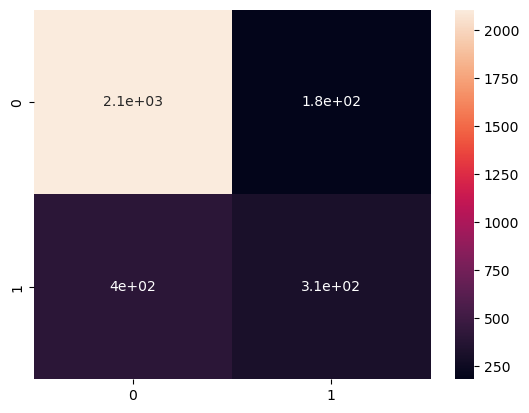

In [57]:
sns.heatmap(mat,annot=True)

In [58]:
#Now doing some feature selsection

In [59]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)

In [60]:
model.fit(X,y)

RandomForestRegressor()

In [61]:
score=model.feature_importances_

In [62]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'RandD', 'accounting', 'hr', 'management',
       'marketing', 'product_mng', 'sales', 'support', 'technical',
       'salary_low', 'salary_medium'],
      dtype='object')

In [63]:
score 

array([4.97877812e-01, 1.40004133e-01, 1.06688454e-01, 9.42976558e-02,
       1.41580501e-01, 1.56987545e-03, 1.18927417e-04, 8.64722083e-04,
       1.08514437e-03, 6.41745000e-04, 6.69313924e-04, 5.85917406e-04,
       5.10265971e-04, 2.20628986e-03, 2.41532065e-03, 2.84774048e-03,
       3.59645225e-03, 2.43973001e-03])

In [81]:
fature_rank=pd.Series(score,index=X.columns ) 

<AxesSubplot:>

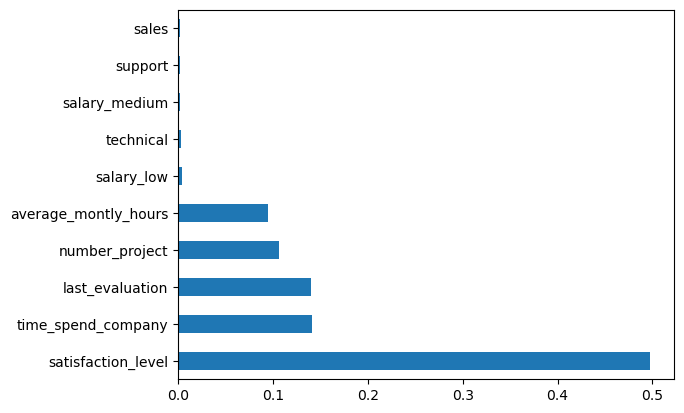

In [85]:
fature_rank.nlargest(10).plot(kind='barh')

In [132]:
 select=df[['satisfaction_level','time_spend_company','number_project','average_montly_hours','salary_low','salary_medium','promotion_last_5years']]

In [133]:
select 

,satisfaction_level,time_spend_company,number_project,average_montly_hours,salary_low,salary_medium,promotion_last_5years
0,0.38,3,2,157,1,0,0
1,0.80,6,5,262,0,1,0
2,0.11,4,7,272,0,1,0
3,0.72,5,5,223,1,0,0
4,0.37,3,2,159,1,0,0
...,...,...,...,...,...,...,...
14994,0.40,3,2,151,1,0,0
14995,0.37,3,2,160,1,0,0
14996,0.37,3,2,143,1,0,0
14997,0.11,4,6,280,1,0,0


In [86]:
val=pd.DataFrame(score)

In [87]:
val 

,0
0,0.497878
1,0.140004
2,0.106688
3,0.094298
4,0.141581
5,0.001570
6,0.000119
7,0.000865
8,0.001085
9,0.000642


In [88]:
col=pd.DataFrame(X.columns)

In [89]:
col 

,0
0,satisfaction_level
1,last_evaluation
2,number_project
3,average_montly_hours
4,time_spend_company
5,Work_accident
6,promotion_last_5years
7,RandD
8,accounting
9,hr


In [99]:
feature_val=pd.concat([col,val ],axis=1)

In [100]:
feature_val 

,0,0
0,satisfaction_level,0.497878
1,last_evaluation,0.140004
2,number_project,0.106688
3,average_montly_hours,0.094298
4,time_spend_company,0.141581
5,Work_accident,0.001570
6,promotion_last_5years,0.000119
7,RandD,0.000865
8,accounting,0.001085
9,hr,0.000642


In [101]:
feature_val.columns=['Name','score']

In [102]:
feature_val

,Name,score
0,satisfaction_level,0.497878
1,last_evaluation,0.140004
2,number_project,0.106688
3,average_montly_hours,0.094298
4,time_spend_company,0.141581
5,Work_accident,0.001570
6,promotion_last_5years,0.000119
7,RandD,0.000865
8,accounting,0.001085
9,hr,0.000642


In [106]:
feature_val.nlargest(10,'score')

,Name,score
0,satisfaction_level,0.497878
4,time_spend_company,0.141581
1,last_evaluation,0.140004
2,number_project,0.106688
3,average_montly_hours,0.094298
16,salary_low,0.003596
15,technical,0.002848
17,salary_medium,0.002440
14,support,0.002415
13,sales,0.002206


In [134]:
select 

,satisfaction_level,time_spend_company,number_project,average_montly_hours,salary_low,salary_medium,promotion_last_5years
0,0.38,3,2,157,1,0,0
1,0.80,6,5,262,0,1,0
2,0.11,4,7,272,0,1,0
3,0.72,5,5,223,1,0,0
4,0.37,3,2,159,1,0,0
...,...,...,...,...,...,...,...
14994,0.40,3,2,151,1,0,0
14995,0.37,3,2,160,1,0,0
14996,0.37,3,2,143,1,0,0
14997,0.11,4,6,280,1,0,0


In [135]:
select.shape

(14999, 7)

In [138]:
xtrain,xtest,ytrain,ytest=train_test_split(select,y,test_size=0.3,random_state=1)

In [139]:
xtest.shape

(4500, 7)

In [140]:
xtrain.shape 

(10499, 7)

In [142]:
model=LogisticRegression()

In [143]:
model.fit(xtrain,ytrain) 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
pred=model.predict(xtest)

In [148]:
model.score(xtest,ytest)

0.7684444444444445